In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Image Size

__This delicious hamburger image is a standard RGB image. How much memory (in bytes) will this image take? You can either compute the answer or read the image and see how much space it takes.__

To calculate the memory size of an RGB image, we need to know the image's dimensions (width and height) and the fact that each pixel in an RGB image is represented by three color channels (Red, Green, and Blue), with each channel typically taking 1 byte (8 bits).

In [2]:
from PIL import Image

# Load the image
image_path = 'hamburger.jpg'
image = Image.open(image_path)

# Get image dimensions
width, height = image.size

# Calculate memory size
memory_size = width * height * 3  # since it's an RGB image

print(f"Memory Size: {memory_size} bytes")

Memory Size: 783126 bytes


#### Histograms
__The images in this figure display, respectively: a part of a cat's eye, completely random noise, and three concentric circles of different brightness. Which image(s) produced Histogram B?__


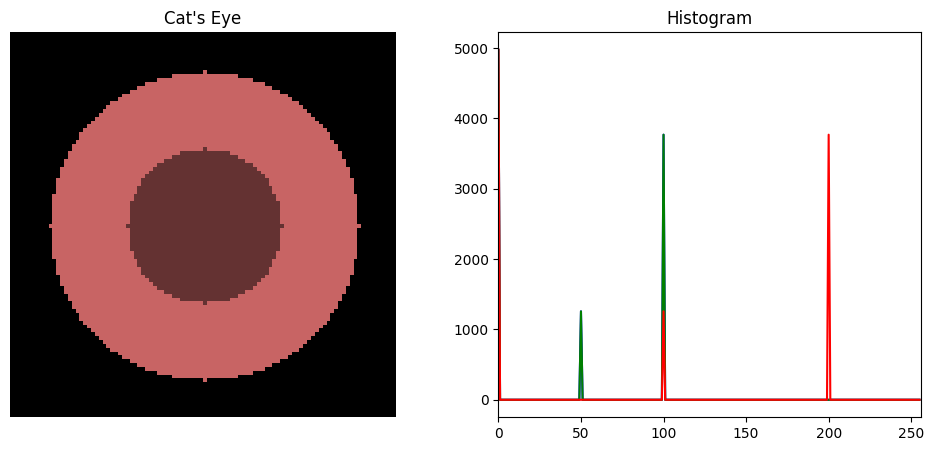

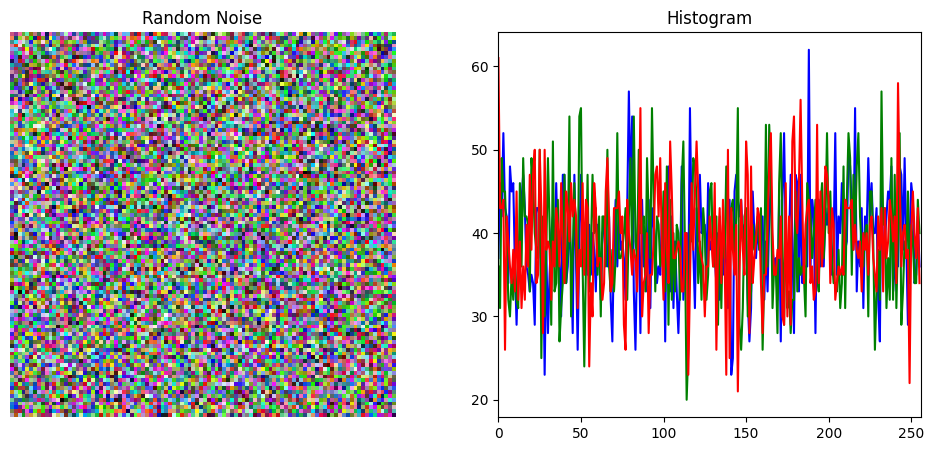

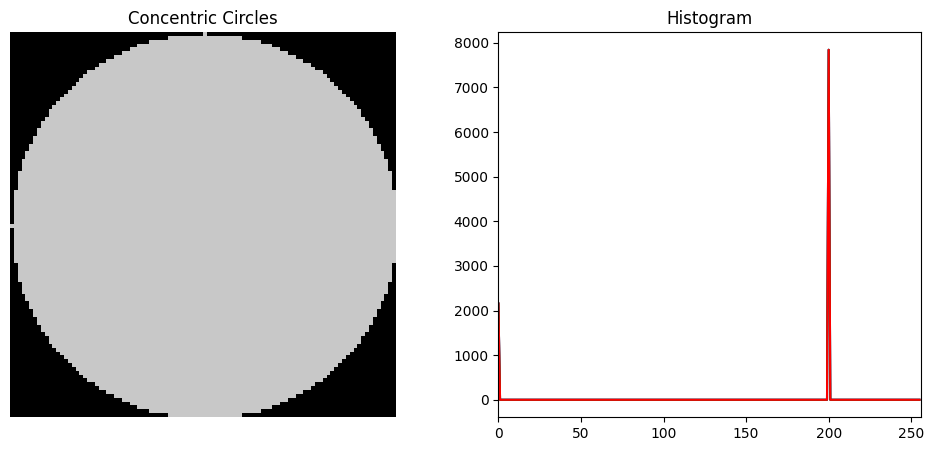

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def generate_cat_eye_image():
    # Create a synthetic 'cat eye' image with varying intensities
    img = np.zeros((100, 100, 3), dtype=np.uint8)
    cv2.circle(img, (50, 50), 40, (100, 100, 200), -1)  # Simulating eye color
    cv2.circle(img, (50, 50), 20, (50, 50, 100), -1)    # Simulating pupil
    return img

def generate_random_noise_image():
    # Create a random noise image
    img = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
    return img

def generate_concentric_circles_image():
    # Create an image with three concentric circles of different brightness
    img = np.zeros((100, 100, 3), dtype=np.uint8)
    cv2.circle(img, (50, 50), 10, (50, 50, 50), -1)     # Inner circle
    cv2.circle(img, (50, 50), 30, (150, 150, 150), -1)  # Middle circle
    cv2.circle(img, (50, 50), 50, (200, 200, 200), -1)  # Outer circle
    return img

def plot_image_and_histogram(img, title):
    # Plot the image and its histogram
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title(title)
    ax[0].axis('off')
    
    # Calculate histogram for each color channel
    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        ax[1].plot(hist, color=color)
        ax[1].set_xlim([0, 256])
    
    ax[1].set_title('Histogram')
    plt.show()

# Generate the images
cat_eye_image = generate_cat_eye_image()
random_noise_image = generate_random_noise_image()
concentric_circles_image = generate_concentric_circles_image()

# Plot images and their histograms
plot_image_and_histogram(cat_eye_image, "Cat's Eye")
plot_image_and_histogram(random_noise_image, "Random Noise")
plot_image_and_histogram(concentric_circles_image, "Concentric Circles")

Histogram B shows distinct peaks at a few intensity levels, which is characteristic of an image with a few distinct brightness values. This matches the description of Image 3, which has three concentric circles of different brightness. The distinct peaks in the histogram correspond to the different brightness levels of the circles in the image.

__Answear:  Image 3__

#### Dominant Channel
__An indication of the dominant color of the image can be the dominant channel, i.e. the channel (R, G, or B) with the greatest average brightness (intensity). What is the mean brightness of the dominant channel in the hamburger image? Round your answer to two decimal places.__

In [4]:
from PIL import Image
import numpy as np

# Load the image
image_path = 'hamburger.jpg'
image = Image.open(image_path)

# Convert image to a NumPy array
image_array = np.array(image)

# Calculate the mean brightness for each channel
mean_red = np.mean(image_array[:, :, 0])
mean_green = np.mean(image_array[:, :, 1])
mean_blue = np.mean(image_array[:, :, 2])

# Identify the dominant channel and its mean brightness
dominant_channel_mean = max(mean_red, mean_green, mean_blue)

print(f"Mean brightness of the dominant channel: {dominant_channel_mean:.2f}")

Mean brightness of the dominant channel: 90.09


Answear: 90.09

Convolution Filter
What does this filter do? Try to guess without applying it directly or looking it up.

\[
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 \\
\end{bmatrix}
\]
Morphology
Read the blue channel of the hamburger image. Perform binary opening on this channel using a 3x3 square as the structuring element. How many white pixels does the resulting image contain?
Note: Depending on the version of skimage you're using, you may get different answers.


- Sharpening
- Blurring
- Edge detection
- Corner detection
- Circle detection
- Object detection
- Rotation
- Scaling
- Solarization
- Posterization
- None of the above


This type of kernel enhances the central pixel relative to its neighbors. When applied, it increases the intensity of the central pixel and decreases the intensities of the neighboring pixels, which emphasizes the differences between the central pixel and its neighbors.

Therefore, this filter is used for sharpening an image. It enhances the edges and fine details, making the image appear crisper.

__Answear: Sharpening__

#### Morphology
__Read the blue channel of the hamburger image. Perform binary opening on this channel using a 3x3 square as the structuring element. How many white pixels does the resulting image contain?
Note: Depending on the version of skimage you're using, you may get different answers.__


In [6]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import binary_opening, square
import numpy as np

image = np.array(image)

# Extract the blue channel
blue_channel = image[:, :, 2]

# Convert the blue channel to a binary image (using Otsu's thresholding for simplicity)
binary_blue_channel = blue_channel > np.mean(blue_channel)

# Perform binary opening with a 3x3 square structuring element
opened_image = binary_opening(binary_blue_channel, square(3))

# Count the number of white pixels in the resulting image
num_white_pixels = np.sum(opened_image)

num_white_pixels

69662

Result: 69662

#### Fourier Transform
__Why can we use the Fourier transform for images (2D)?__
- - To perform classification
- To compress an image
- To detect edges
- To remove image noise
- To get frequency features
- To get spatial features
- As an alternative to image morphology

Answear: 
- To compress an image
- To detect edges
- To remove image noise
- To get frequency features

#### Geometric Transformations
__Which of the following is / are true? Remember that all geometric transformations can be represented by matrices.__
- Linear transformations preserve parallel lines
- Scaling preserves aspect ratio
- Affine transformations are a special case of linear transformations
- When transforming, we prefer linear interpolation for the pixel values
- The shear transform preserves angles and lines
- Horizontal and vertical flips are affine maps
- The Mercator projection is an affine map
- We can only apply rotation around the center of the image

Answear: 
- Linear transformations preserve parallel lines.
- When transforming, we prefer linear interpolation for the pixel values.
- Horizontal and vertical flips are affine maps.- 

#### Convolutional NNs
__What is the purpose of a pooling layer in a CNN?__
- Avoids linearity in layer outputs
- Helps the model train faster
- Reduces the spatial dimensions of the "image" (convolutional volume)
- Applies backpropagation through space
- Performs gradient descent
- Allows us to have much deeper CNNs
- All of the above
- None of the above

Answear:
- Reduces the spatial dimensions of the "image" (convolutional volume)
- Helps the model train faster
- Allows us to have much deeper CNNs